In [26]:
import dotenv
import openai  
import os  
import numpy as np  
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 


# .env file must have OPENAI_API_KEY and OPENAI_API_BASE
dotenv.load_dotenv()
openai.api_type = "azure"
openai.api_base = os.getenv("OPENAI_API_BASE")
openai.api_version = "2023-03-15-preview"
openai.api_key = os.getenv("OPENAI_API_KEY")

In [27]:
# Function to get embeddings  
def get_embeddings(text):  
    response = openai.Embedding.create(  
        input=text,  
        engine="text-embedding-ada-002"  # Make sure to use the correct model name  
    )  
    return response['data'][0]['embedding'] 

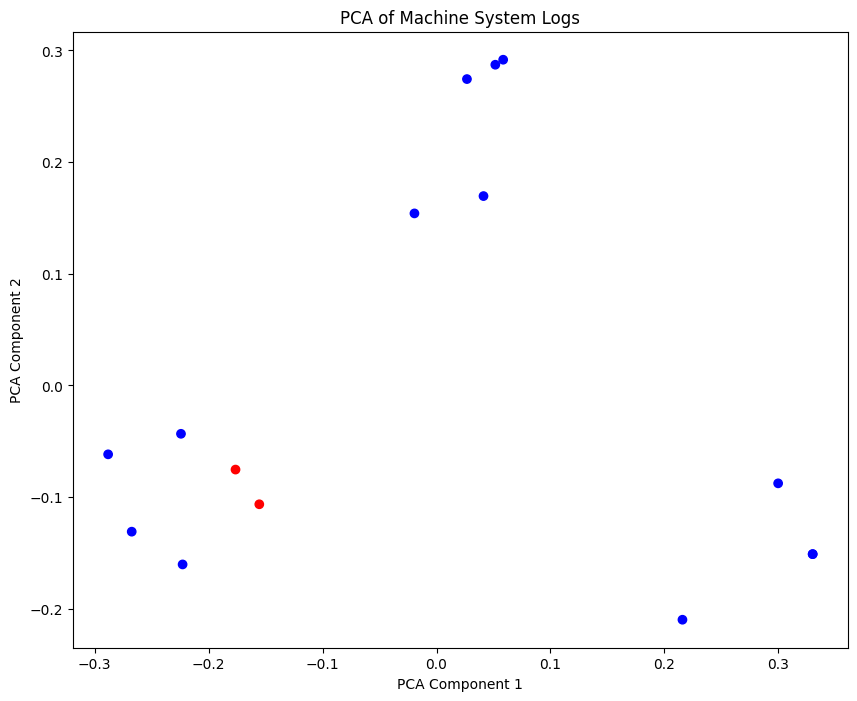

In [ ]:
# Create the sample data  
data = {  
    'idx': range(1, 16),  
    'content': [  
        'System boot complete',  
        'User login successful',  
        'File accessed: /var/log/syslog',  
        'Error: Disk read failure',  
        'Network connection established',  
        'User logout successful',  
        'File created: /home/user/document.txt',  
        'Error: Memory allocation failure',  
        'System update completed',  
        'User login successful',  
        'File deleted: /tmp/tempfile',  
        'Network connection terminated',  
        'System backup completed',  
        'User login failed',  
        'File accessed: /etc/hosts'
    ],  
    'class': [  
        'Normal', 'Normal', 'Normal', 'Error', 'Normal', 'Normal',   
        'Normal', 'Error', 'Normal', 'Normal', 'Normal', 'Normal',   
        'Normal', 'Normal', 'Normal'  
    ]  
}  
  
# Create the DataFrame  
df = pd.DataFrame(data)  
  
# Get embeddings for all content in the dataframe  
df['embedding'] = df['content'].apply(get_embeddings)  
  
# Apply PCA  
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(df['embedding'].tolist())  
  
# Add PCA results to the dataframe  
df['pca_one'] = pca_result[:, 0]  
df['pca_two'] = pca_result[:, 1]  
  
# Plot the results  
plt.figure(figsize=(10, 8))  
colors = {'Normal':'blue', 'Error':'red'}  
plt.scatter(df['pca_one'], df['pca_two'], c=df['class'].apply(lambda x: colors[x]))  
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  
plt.title('PCA of Machine System Logs')  
plt.show()  

[-0.03858974 -0.09271262  0.1724119  -0.15553911] [-0.04945665 -0.00247458 -0.08479589 -0.10634985]


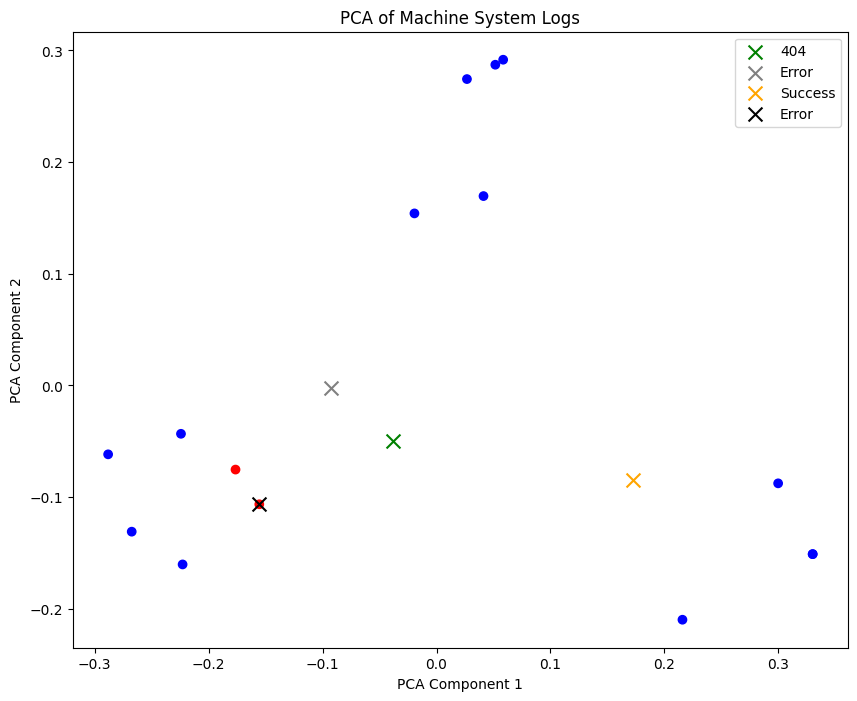

In [ ]:
# Additional content  
additional_content = [  
    '404 webpage not found',  
    'Error: Network timeout',
    'Success: user authenticated and authorized code 200', 
    'Error: Memory allocation failure'
]  
  
new_embeddings = [get_embeddings(c) for c in additional_content]  
  
# Apply PCA  
pca_result_new = pca.transform(new_embeddings)  

# print(pca_result_new[:, 0]  , pca_result_new[:, 1]  )

# Plot the results  
plt.figure(figsize=(10, 8))  
colors = {'Normal':'blue', 'Error':'red'}  
plt.scatter(df['pca_one'], df['pca_two'], c=df['class'].apply(lambda x: colors[x]))
# plt.scatter(pca_result_new[:, 0], pca_result_new[:, 1], color='orange', marker='x', label='New Data')  
plt.scatter(pca_result_new[0, 0], pca_result_new[0, 1], c='green', marker='x', s=100, label='404')
plt.scatter(pca_result_new[1, 0], pca_result_new[1, 1], c='gray', marker='x', s=100, label='Error')
plt.scatter(pca_result_new[2, 0], pca_result_new[2, 1], c='orange', marker='x', s=100, label='Success')
plt.scatter(pca_result_new[3, 0], pca_result_new[3, 1], c='black', marker='x', s=100, label='Error')
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  
plt.title('PCA of Machine System Logs')
plt.legend()  
plt.show()  

In [30]:
# # Input list  
# log_entries = [  
#     "May 12 08:00:00 server1 systemd[1]: Starting Daily Cleanup of Temporary Directories...",  
#     "May 12 08:00:01 server1 systemd[1]: Started Daily Cleanup of Temporary Directories.",  
#     "May 12 08:05:34 server1 sshd[1042]: Accepted password for admin from 10.0.0.5 port 60234 ssh2",  
#     "May 12 08:10:00 server1 systemd[1]: Starting Backup of /home...",  
#     "May 12 08:10:45 server1 backup[5678]: INFO: Backup process started",  
#     "May 12 08:15:19 server1 backup[5678]: ERROR: Failed to back up /home/user1: No space left on device",  
#     "May 12 08:20:12 server1 sshd[2031]: Failed password for root from 192.168.0.12 port 44321 ssh2",  
#     "May 12 08:25:11 server1 kernel: [65432.234567] [Memory Error]: ECC memory error detected",  
#     "May 12 08:30:27 server1 appname[7890]: WARNING: Disk space running low",  
#     "May 12 08:35:44 server1 firewall[9876]: Allowed UDP connection from 203.0.113.45 to 192.168.1.200 on port 53",  
#     "May 12 08:40:06 server1 firewall[1098]: Denied ICMP request from 198.51.100.24 to 192.168.1.101",  
#     "May 12 08:45:00 server1 systemd[1]: Starting System Reboot...",  
#     "May 12 08:45:30 server1 systemd[1]: Reached target System Reboot.",  
#     "May 12 08:50:00 server1 kernel: [0.000000] Initializing cgroup subsys cpuset",  
#     "May 12 08:50:01 server1 kernel: [0.000000] Initializing cgroup subsys cpu",  
#     "May 12 08:50:02 server1 kernel: [0.000000] Initializing cgroup subsys cpuacct",  
#     "May 12 08:50:03 server1 kernel: [0.000000] Linux version 4.15.0-20-generic (buildd@lgw01-amd64) (gcc version 7.3.0 (Ubuntu 7.3.0-16ubuntu3)) #21-Ubuntu SMP Tue Apr 24 06:15:06 UTC 2018",  
#     "May 12 08:50:04 server1 systemd[1]: Started Flush Journal to Persistent Storage.",  
#     "May 12 08:55:01 server1 sshd[1042]: Accepted password for user1 from 10.0.0.6 port 61234 ssh2",  
#     "May 12 09:00:27 server1 appname[8901]: DEBUG: User request processed in 0.123 seconds",  
#     "May 12 09:05:00 server1 systemd[1]: Starting Cleanup of Temporary Directories...",  
#     "May 12 09:05:01 server1 systemd[1]: Started Cleanup of Temporary Directories.",  
#     "May 12 09:10:33 server1 appname[5678]: INFO: Cleanup process completed successfully",  
#     "May 12 09:15:45 server1 sshd[3054]: Accepted publickey for user3 from 172.16.0.8 port 55233 ssh2"  
# ]  


# Get embeddings for each log entry  
# embeddings = [get_embeddings(entry) for entry in log_entries]  
  
# # Perform PCA on the embeddings  
# pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization  
# reduced_embeddings = pca.fit_transform(embeddings)  
  
# # # Print the reduced embeddings  
# # for i, entry in enumerate(log_entries):  
# #     print(f"Log Entry: {entry}")  
# #     print(f"Reduced Embedding: {reduced_embeddings[i]}")  
# #     print()  

# # plot the reduced embeddings
# plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("PCA of Log Entry Embeddings")
# plt.show()